In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
np.random.seed(1)
budget=np.random.randint(50,200,50)
box_office=budget*np.random.uniform(1.5,2.5,50)
rating=0.03*budget+0.01*box_office+np.random.normal(0,1,50)

df=pd.DataFrame({
    'Budget':budget,
    'BoxOffice':box_office,
    'Rating':rating
})
print(df)

    Budget   BoxOffice     Rating
0       87  184.790609   4.274369
1      190  410.520789   9.252233
2      122  219.416426   5.698451
3      187  363.927153   9.821664
4      183  315.148792   9.401443
5      129  202.963978   6.635322
6      194  382.032274  10.654215
7      179  285.714835   7.488717
8      121  290.807790   6.795785
9      184  297.986246   7.362411
10      75  151.859953   5.346741
11      70  110.853610   3.033426
12     151  364.946062   6.450372
13     196  472.447883  10.360404
14     189  339.997791   9.263058
15     192  400.202711  11.009823
16     100  206.591203   5.016592
17     118  249.444721   5.264099
18     146  358.654206   7.192490
19     136  239.493141   7.084950
20     191  330.623946   7.489158
21     187  380.254868   9.207781
22      57  139.646474   1.638173
23     113  225.215734   5.683710
24     111  226.506656   5.621898
25      72  163.114928   3.150023
26     107  165.351993   4.494204
27      51   83.638272   1.199088
28     178  40

In [7]:
#Simple Linear Regression

X_simple=df[['Budget']]
y=df['Rating']
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_simple,y,test_size=0.2,random_state=1)
model_simple=LinearRegression()
model_simple.fit(X_train_s,y_train_s)
y_predict_s=model_simple.predict(X_test_s)

#Multiple Linear Regression

X_multiple=df[['Budget','BoxOffice']]
X_train_m,X_test_m,y_train_m,y_test_m=train_test_split(X_multiple,y,test_size=0.2,random_state=1)
model_multi=LinearRegression()
model_multi.fit(X_train_m,y_train_m)
y_predict_m=model_multi.predict(X_test_m)


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


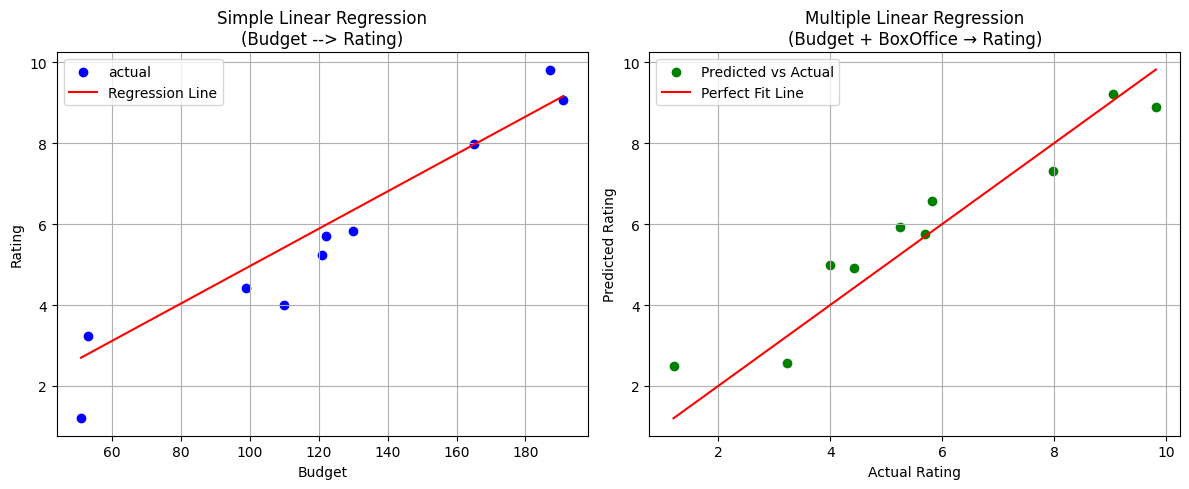

In [12]:
# Step4: Plotting Both with Regression Lines

plt.figure(figsize=(12,5))


#Plot for Simple Linear Regression

plt.subplot(1,2,1)
plt.scatter(X_test_s,y_test_s,color='blue',label='actual')
x_line=np.linspace(X_test_s.min(),X_test_s.max(),100).reshape(-1,1)
y_line=model_simple.predict(x_line)
plt.plot(x_line,y_line,color='red',label='Regression Line')
plt.xlabel("Budget")
plt.ylabel("Rating")
plt.title("Simple Linear Regression\n(Budget --> Rating)")
plt.legend()
plt.grid(True)


#Plot For Multiple Linear Regression

plt.subplot(1, 2, 2)
plt.scatter(y_test_m, y_predict_m, color='green', label='Predicted vs Actual')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], color='red', label='Perfect Fit Line')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Multiple Linear Regression\n(Budget + BoxOffice → Rating)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()